In [2]:
#Importing the library  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn


In [3]:
#Loading HR data
df1=pd.read_csv('/content/hr_data.csv')

In [4]:

df1.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [5]:
#to checking the null value or not
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [6]:
#loading Employee satisfaction evalution data
df2=pd.read_excel('/content/employee_satisfaction_evaluation.xlsx')

In [7]:
df2.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EMPLOYEE #          14999 non-null  int64  
 1   satisfaction_level  14972 non-null  float64
 2   last_evaluation     14972 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 351.7 KB


In [9]:
#Merging and Joining data 

In [10]:
#Here i have join df1 and df2 data 
main=df1.set_index('employee_id').join(df2.set_index('EMPLOYEE #'))

In [11]:
main.head() 

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
employee_id,,,,,,,,,,
1003,2,157,3,0,1,0,sales,low,0.38,0.53
1005,5,262,6,0,1,0,sales,medium,0.80,0.86
1486,7,272,4,0,1,0,sales,medium,0.11,0.88
1038,5,223,5,0,1,0,sales,low,0.72,0.87
1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [12]:
main.describe()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
#main[main.isnull().any(axis=1)]

In [14]:
main.isnull().sum()

number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
satisfaction_level       27
last_evaluation          27
dtype: int64

In [15]:
main.fillna(main.mean(),inplace=True) # fill with mode for low variance

In [16]:
main.isnull().sum()

number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
satisfaction_level       0
last_evaluation          0
dtype: int64

In [17]:
main['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [18]:
#Data Visualization 

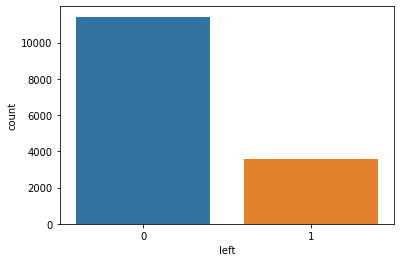

In [19]:
sn.countplot(x=main['left'])

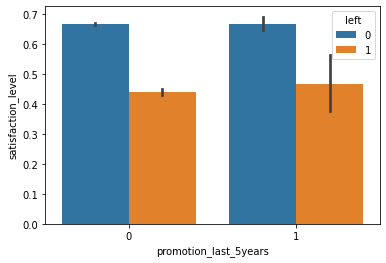

In [20]:
sn.barplot(x='promotion_last_5years',y='satisfaction_level',data=main,hue='left')

In [21]:
#Data preprocessing 

X=main.drop(['left'],axis=1)
y = main.left

In [22]:
X


,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
employee_id,,,,,,,,,
1003,2,157,3,0,0,sales,low,0.38,0.53
1005,5,262,6,0,0,sales,medium,0.80,0.86
1486,7,272,4,0,0,sales,medium,0.11,0.88
1038,5,223,5,0,0,sales,low,0.72,0.87
1057,2,159,3,0,0,sales,low,0.37,0.52
...,...,...,...,...,...,...,...,...,...
87670,2,151,3,0,0,support,low,0.40,0.57
87673,2,160,3,0,0,support,low,0.37,0.48
87679,2,143,3,0,0,support,low,0.37,0.53


In [23]:
y

employee_id
1003     1
1005     1
1486     1
1038     1
1057     1
        ..
87670    1
87673    1
87679    1
87681    1
87684    1
Name: left, Length: 14999, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [64]:
#training the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=89)
num_features = list(main.columns)
for x in ['salary','department','left']:
    num_features.remove(x)
sc = StandardScaler()
X_train_std=sc.fit_transform(X_train[num_features])
X_test_std=sc.transform(X_test[num_features])

In [65]:
# main model for KNN
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std,y_train)
prediction_knn=knn.predict(X_test_std)
accuracy_knn=accuracy_score(y_test,prediction_knn)

In [66]:
#testing the data
scores_dict={}
print('Accuracy score : ',accuracy_knn)
scores_dict['KNeighborsClassifier'] = accuracy_score(y_test,prediction_knn)
print(classification_report(y_test,prediction_knn))

Accuracy score :  0.972
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3432
           1       0.94      0.95      0.94      1068

    accuracy                           0.97      4500
   macro avg       0.96      0.96      0.96      4500
weighted avg       0.97      0.97      0.97      4500

